In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import torch

# importing custom modules
from utils.run_experiments import run_experiments_fn
from utils.load_experimental_results import load_experimental_results
from utils.plot_results import plot_results
from utils.gen_stats import gen_stats
from utils.evaluate_experiments import evaluate_experiments

In [2]:
env = gym.envs.make("CartPole-v1", render_mode = 'human')
obs_space = env.observation_space
action_space = env.action_space
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

#w = SummaryWriter()

print(f"The observation space: {obs_space}")
print(f"The action space: {action_space}")

observation = env.reset()

The observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
The action space: Discrete(2)


# Example of CartPole Environment

In [3]:
num_steps = 50

# Run the environment for 50 steps
# Note, this will open a pygame window
for i in range(num_steps):
    env.reset()
    env.render()

# Model Parameters

In [4]:
# Global parameters
run_experiments = True
num_experiments = 3
train_cartpole = True
verbose = True

# DQN Agent (QAgent) Parameters
## Hyperparameters
q_title = 'DQN'
q_hidden_dim = 64
q_lr = 0.001
q_gamma = 0.9
q_epsilon = 0.9
q_eps_decay = 0.99
q_replay = False # automatically set below
q_replay_size = 20
q_n_update = 10

# PPO Agent (PPOAgent) Parameters
## Hyperparameters
ppo_title = 'PPO'
ppo_hidden_dim = 24
ppo_gamma = 0.99
ppo_update_freq = 1
ppo_k_epoch = 3
ppo_lr = 0.02
ppo_lambda = 0.95
ppo_eps_clip = 0.2
ppo_v_coef = 1
ppo_ent_coef = 0.01
ppo_mem_size = 400

# Dictory of parameters for each agent
q_params = {
    'title': q_title,
    'hidden_dim': q_hidden_dim,
    'lr': q_lr,
    'gamma': q_gamma,
    'epsilon': q_epsilon,
    'eps_decay': q_eps_decay,
    'n_update': q_n_update,
    'replay_size': q_replay_size,
    'replay': False, # automatically set
    'train_cartpole': train_cartpole,
    'verbose': verbose
}

q_params_replay = {
    'title': q_title,
    'hidden_dim': q_hidden_dim,
    'lr': q_lr,
    'gamma': q_gamma,
    'epsilon': q_epsilon,
    'eps_decay': q_eps_decay,
    'n_update': q_n_update,
    'replay_size': q_replay_size,
    'replay': True, # automatically set
    'train_cartpole': train_cartpole,
    'verbose': verbose
}

ppo_params = {
    'title': ppo_title,
    'hidden_dim': ppo_hidden_dim,
    'gamma': ppo_gamma,
    'update_freq': ppo_update_freq,
    'k_epoch': ppo_k_epoch,   
    'lr': ppo_lr,
    'lmbda': ppo_lambda,
    'eps_clip': ppo_eps_clip,
    'v_coef': ppo_v_coef,
    'entropy_coef': ppo_ent_coef,
    'memory_size': ppo_mem_size,
    'train_cartpole': train_cartpole,
    'verbose': verbose
}


# Deep Q-Learning without Replay

In [5]:
experimental_results, avg_rwd, avg_num_epi, avg_time = run_experiments_fn(agent_parameters=q_params, 
                                                                          model_type = 'dqn', 
                                                                          run_experiments = run_experiments, 
                                                                          num_experiments=num_experiments)

Experiment DQN_64_0.001_0.9_0.9_0.99_10_20_False has already been run. Skipping...
Plot can be found at dqn_experiments/plots/DQN_64_0.001_0.9_0.9_0.99_10_20_False_experimental_results.png
Experimental results can be found at dqn_experiments/plots/DQN_64_0.001_0.9_0.9_0.99_10_20_False_experimental_results.npy
At the bottom of the ipynb file, use load_experimental_results() to load the results.


# Deep Q-Learning with Replay

In [6]:
experimental_results, avg_rwd, avg_num_epi, avg_time = run_experiments_fn(agent_parameters=q_params_replay, 
                                                                          model_type = 'dqn', 
                                                                          run_experiments = run_experiments, 
                                                                          num_experiments=num_experiments)

Experiment DQN_64_0.001_0.9_0.9_0.99_10_20_True has already been run. Skipping...
Plot can be found at dqn_experiments/plots/DQN_64_0.001_0.9_0.9_0.99_10_20_True_experimental_results.png
Experimental results can be found at dqn_experiments/plots/DQN_64_0.001_0.9_0.9_0.99_10_20_True_experimental_results.npy
At the bottom of the ipynb file, use load_experimental_results() to load the results.


# Proximal Policy Optimization Model

In [7]:
experimental_results, avg_rwd, avg_num_epi, avg_time = run_experiments_fn(agent_parameters=ppo_params, 
                                                                          model_type = 'ppo', 
                                                                          run_experiments = run_experiments, 
                                                                          num_experiments=num_experiments)

Experiment PPO_24_0.99_1_3_0.02_0.95_0.2_1_0.01_400 has already been run. Skipping...
Plot can be found at ppo_experiments/plots/PPO_24_0.99_1_3_0.02_0.95_0.2_1_0.01_400_experimental_results.png
Experimental results can be found at ppo_experiments/plots/PPO_24_0.99_1_3_0.02_0.95_0.2_1_0.01_400_experimental_results.npy
At the bottom of the ipynb file, use load_experimental_results() to load the results.


# Load Previous Experimental Results

In [8]:
# Here are two examples of how to use the load_experimental_results function
string_example = 'PPO_24_0.99_1_3_0.02_0.95_0.2_1_0.01_400'
parameter_example = {
    'title': q_title,
    'hidden_dim': q_hidden_dim,
    'lr': q_lr,
    'gamma': q_gamma,
    'epsilon': q_epsilon,
    'eps_decay': q_eps_decay,
    'n_update': q_n_update,
    'replay_size': q_replay_size,
    'replay': True, # automatically set
    'train_cartpole': train_cartpole,
    'verbose': verbose
}

In [9]:
print(load_experimental_results(parameter_example, is_parameters=False, model_type='dqn', help=True))


    Description:
        Loads the experimental results from the numpy files saved by run_experiments.py
        and displays the plots. If the experiment has not been run, it will return None.
        Example usage can be found near the bottom of Pattern Rec Project.ipynb

    Arguments:
        agent_parameters_or_title: dictionary, parameters of the agent; or string, title of the experiment
        is_parameters: boolean, if True, agent_parameters_or_title is a dictionary of parameters, else it is a string
            note: if is_parameters is False, then the title of the experiment must exactly match the title of the experiment
            without the '_experimental_results.npy' or '_num_episodes_per_experiment.npy' or '_training_time_per_experiment.npy'
        model_type: string, either 'dqn' or 'ppo' (only necessary if is_parameters is True)
        help: boolean, if True, prints the help message

    Returns:
        experimental_results: list of lists, each list is the reward




Average reward of last 100 episodes: [201.22, 236.55, 1179.7]
Average number of episodes per experiment: [101.0]
Average training time per experiment: 67.25666666666666 seconds


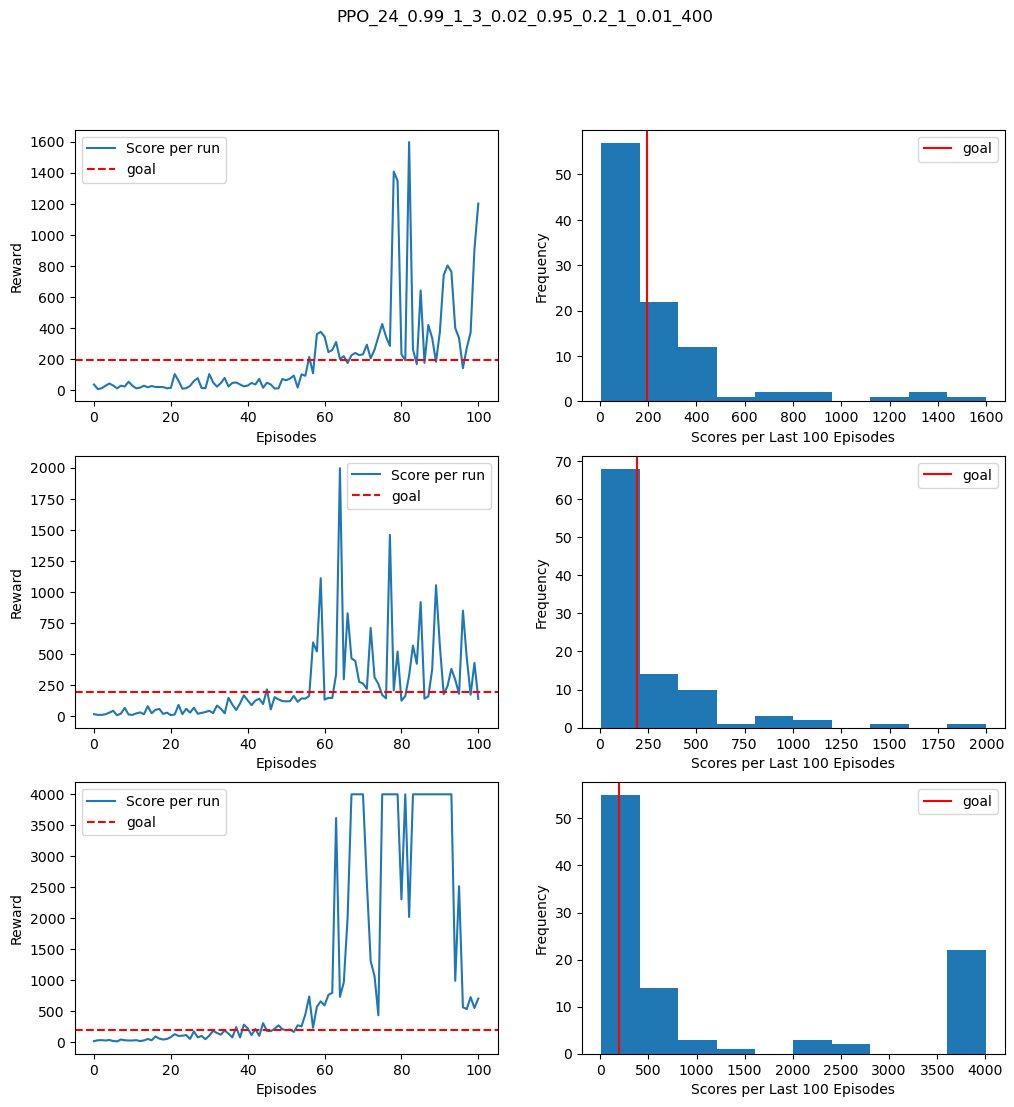

In [10]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(string_example, is_parameters=False, model_type='ppo')
plot = plot_results(experimental_results, title = string_example, run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")

Average reward of last 100 episodes: [199.47, 198.66, 198.5]
Average number of episodes per experiment: [547.6666666666666]
Average training time per experiment: 303.08 seconds


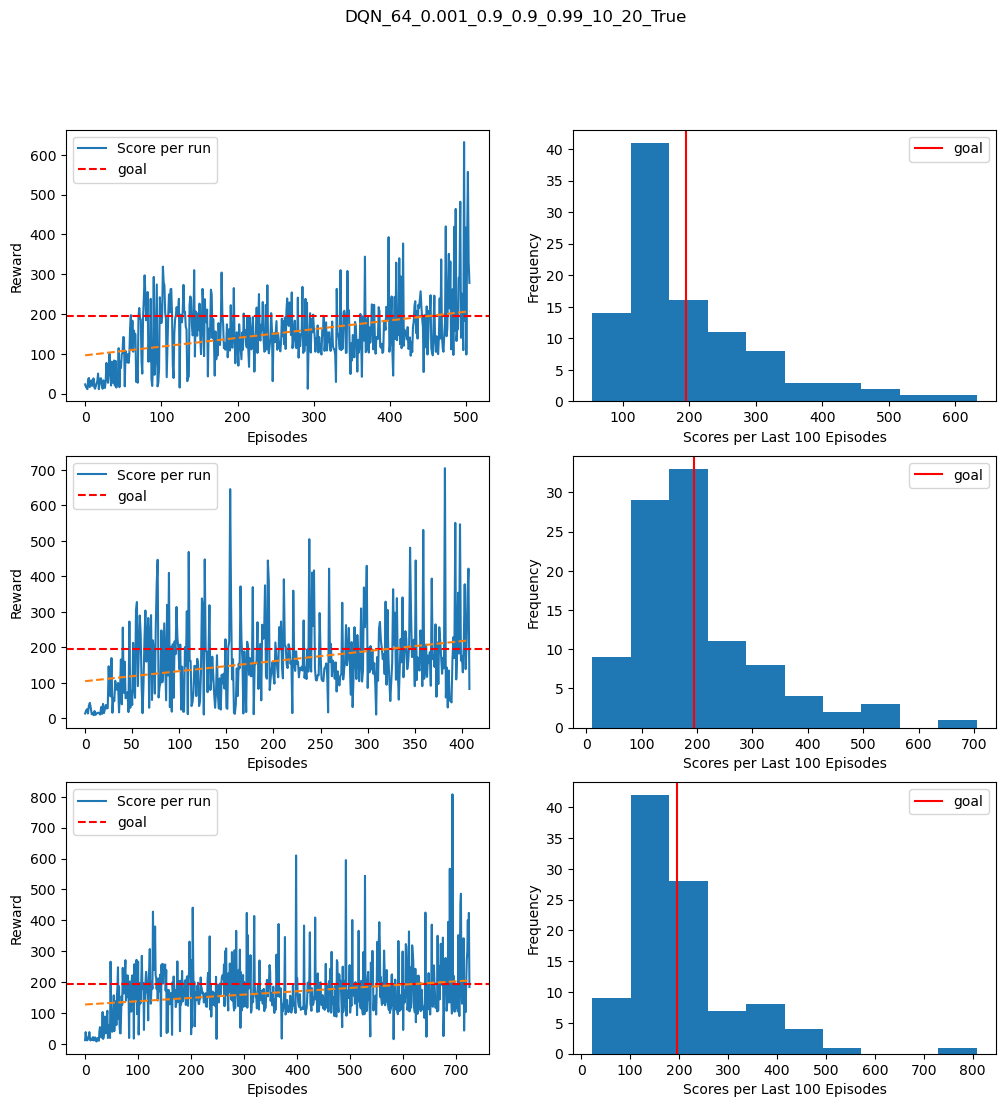

In [11]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, title = load_experimental_results(parameter_example, is_parameters=True, model_type='dqn')
plot = plot_results(experimental_results, title = title, run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")


## Evaluation of Experiments

In [12]:
dqn_names_best, ppo_names_best, dqn_df, ppo_df = evaluate_experiments()

Best DQN reward:  DQN_24_0.001_0.999_0.9_0.99_10_20_True
Best DQN episode:  DQN_24_0.001_0.9_0.9_0.99_10_20_True
Best DQN time:  DQN_24_0.05_0.9_0.9_0.99_10_20_False
Best PPO reward:  PPO_24_0.99_1_3_0.02_0.95_0.2_1_0.01_800
Best PPO episode:  PPO_24_0.99_1_3_0.02_0.95_0.2_1_0.01_400
Best PPO time:  PPO_24_0.9_1_3_0.02_0.95_0.2_1_0.01_400


#### Best DQNs

Average reward of last 100 episodes: [326.55, 331.55, 273.18]
Average number of episodes per experiment: [219.0]
Average training time per experiment: 111.05666666666667 seconds


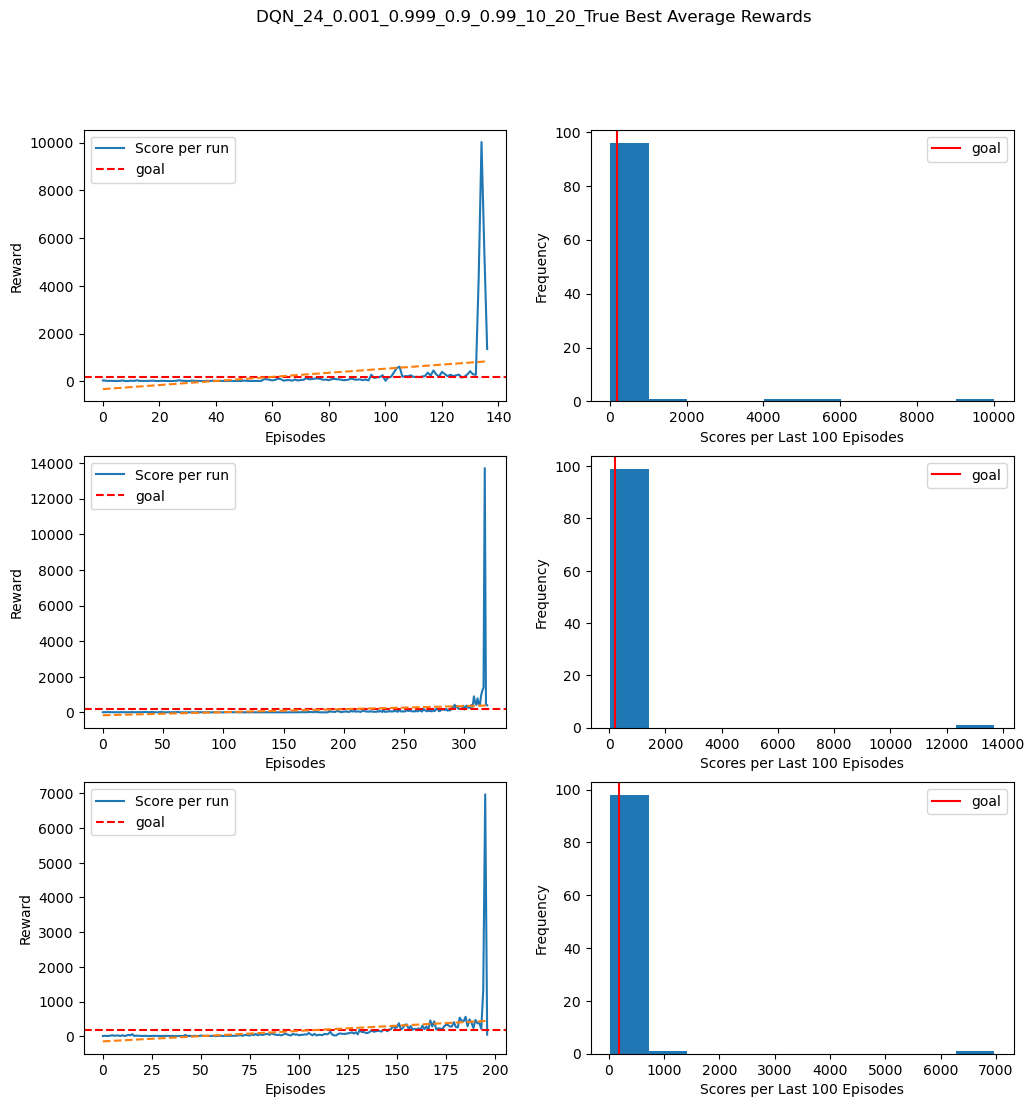

In [13]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(dqn_names_best[0], is_parameters=False, model_type='dqn')
plot = plot_results(experimental_results, title = dqn_names_best[0]+' Best Average Rewards', run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")

Average reward of last 100 episodes: [201.22, 196.48, 198.57]
Average number of episodes per experiment: [153.0]
Average training time per experiment: 72.64666666666666 seconds


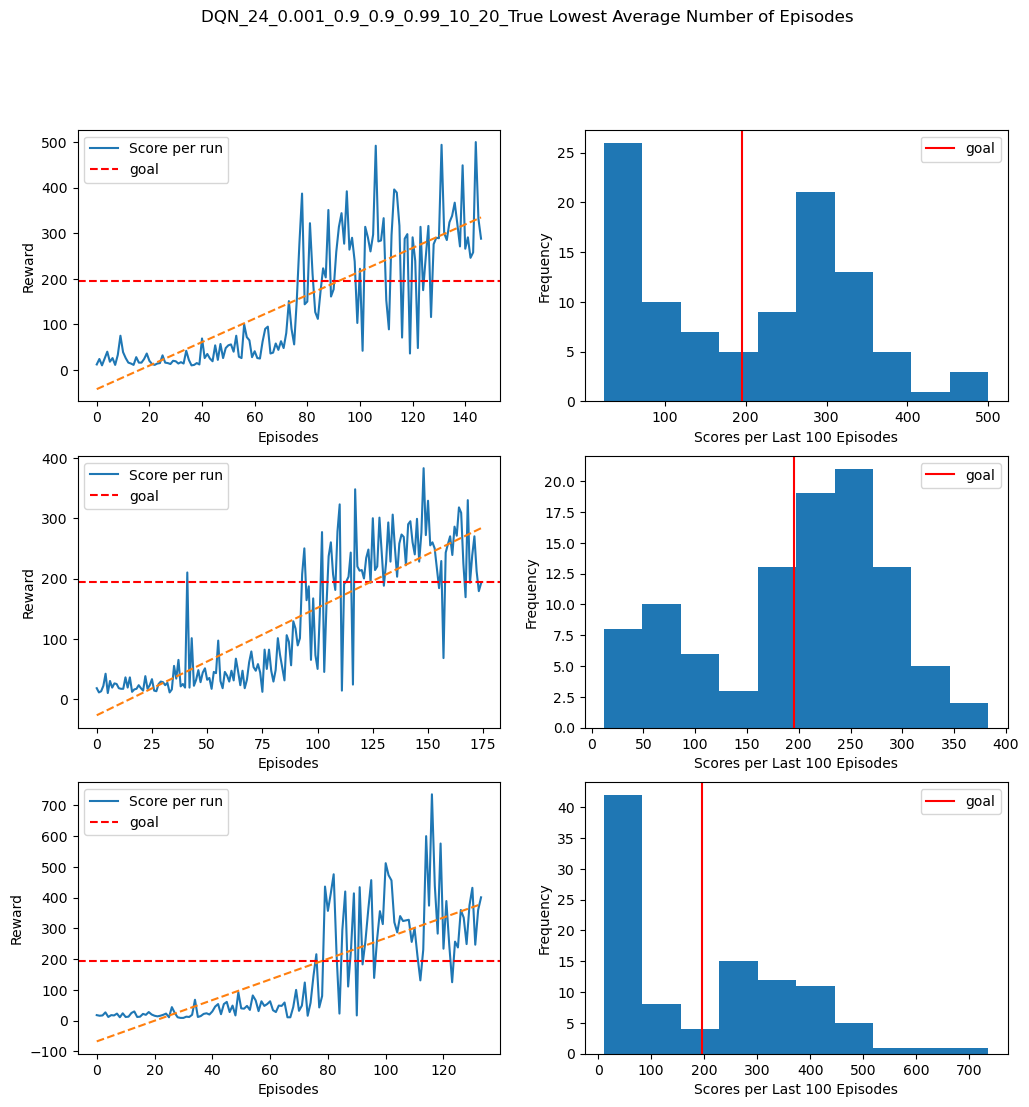

In [14]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(dqn_names_best[1], is_parameters=False, model_type='dqn')
plot = plot_results(experimental_results, title = dqn_names_best[1]+' Lowest Average Number of Episodes', run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")




Average reward of last 100 episodes: [9.51, 9.39, 15.41]
Average number of episodes per experiment: [2001.0]
Average training time per experiment: 53.88666666666666 seconds


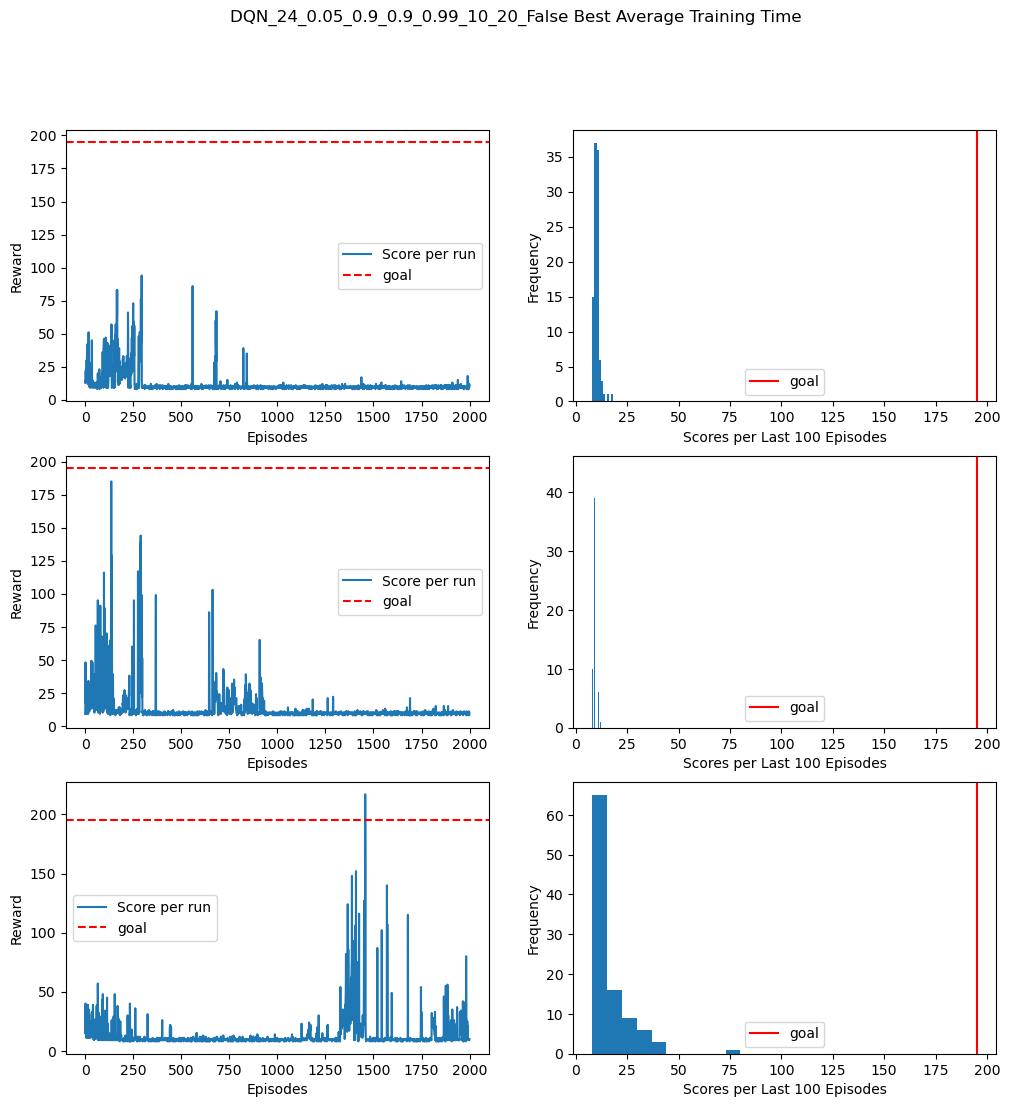

In [15]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(dqn_names_best[2], is_parameters=False, model_type='dqn')
plot = plot_results(experimental_results, title = dqn_names_best[2]+' Best Average Training Time', run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")

#### Best PPOs

Average reward of last 100 episodes: [196.68, 195.36, 1574.18]
Average number of episodes per experiment: [376.0]
Average training time per experiment: 176.19333333333336 seconds


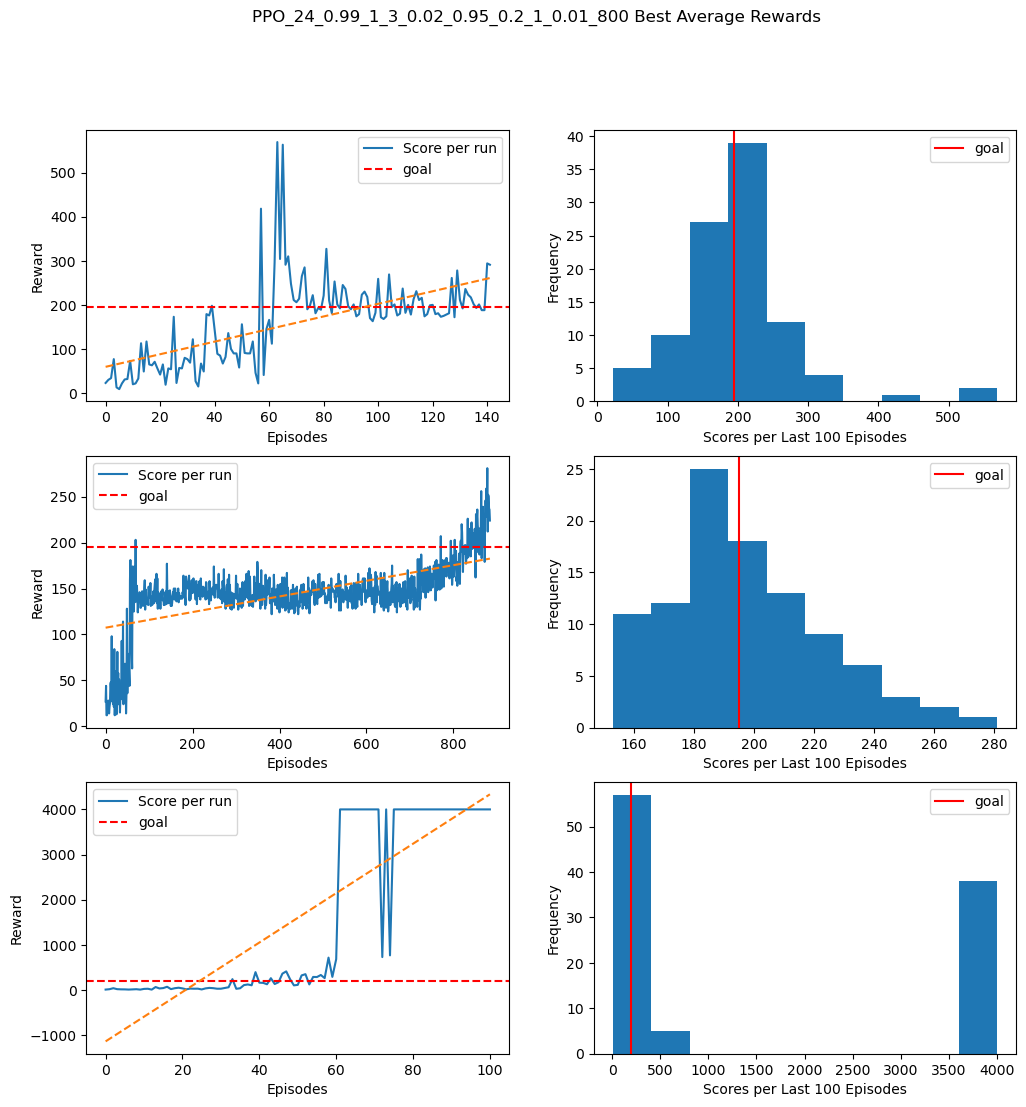

In [16]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(ppo_names_best[0], is_parameters=False, model_type='ppo')
plot = plot_results(experimental_results, title = ppo_names_best[0]+' Best Average Rewards', run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")




Average reward of last 100 episodes: [201.22, 236.55, 1179.7]
Average number of episodes per experiment: [101.0]
Average training time per experiment: 67.25666666666666 seconds


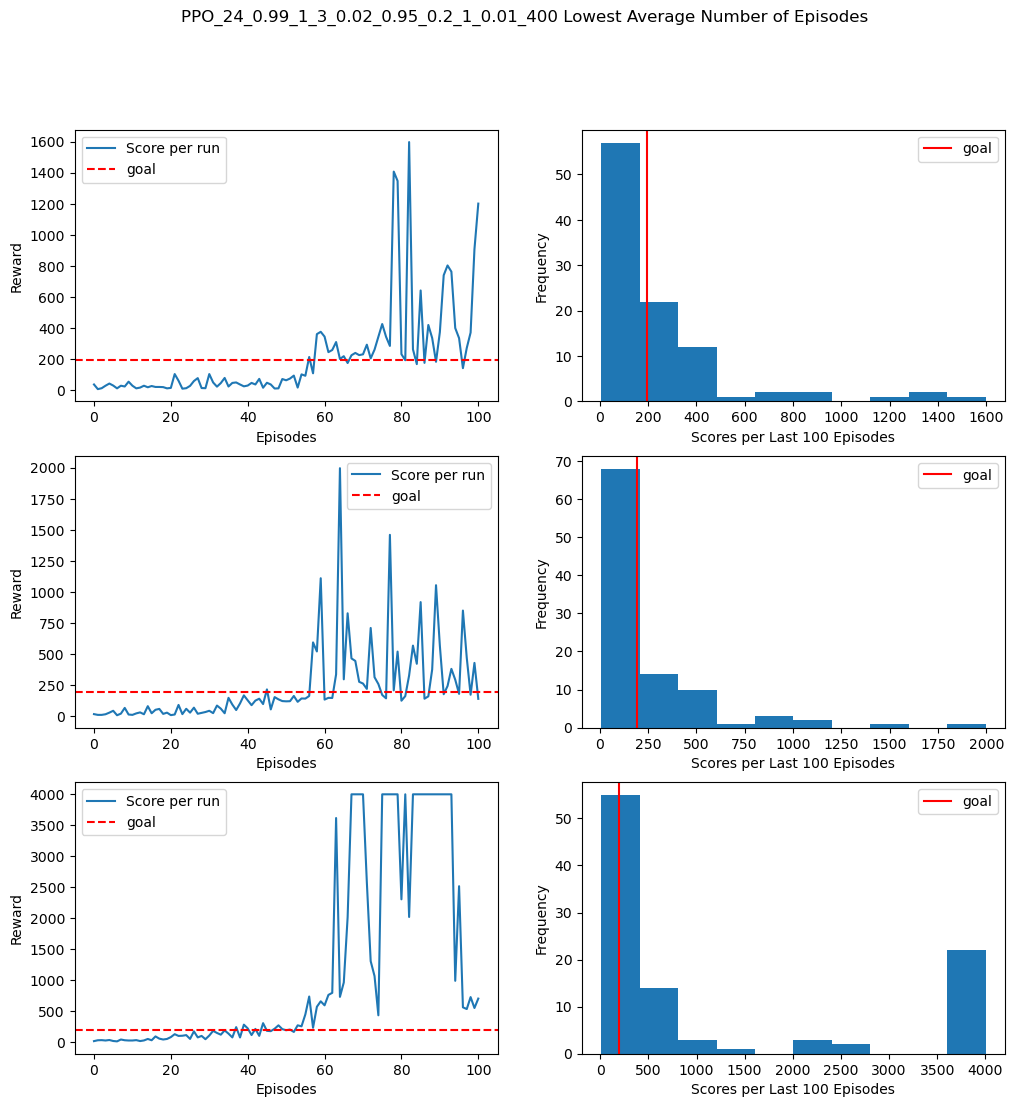

In [17]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(ppo_names_best[1], is_parameters=False, model_type='ppo')
plot = plot_results(experimental_results, title = ppo_names_best[1]+' Lowest Average Number of Episodes', run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")

Average reward of last 100 episodes: [196.73, 195.33, 196.56]
Average number of episodes per experiment: [126.33333333333333]
Average training time per experiment: 32.93 seconds


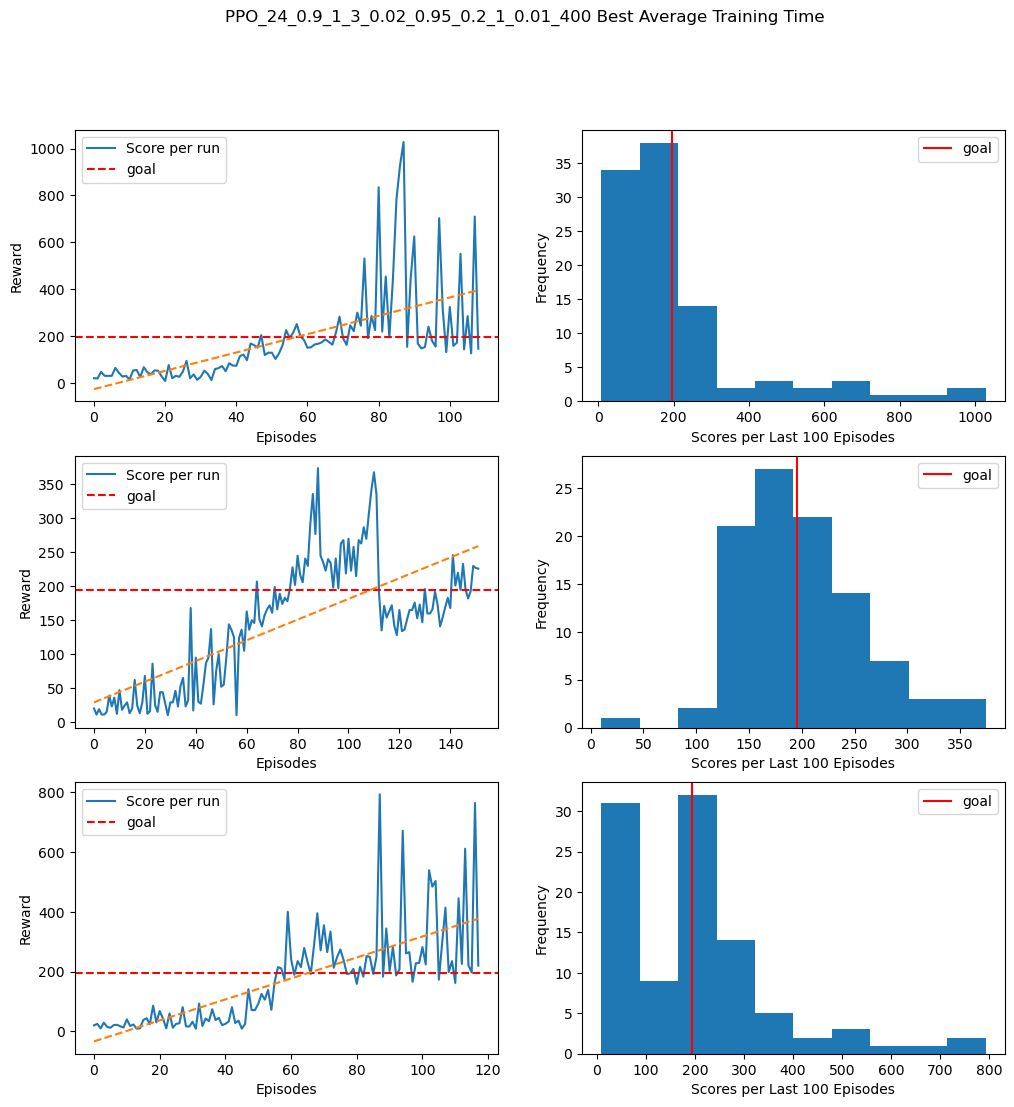

In [18]:
experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(ppo_names_best[2], is_parameters=False, model_type='ppo')
plot = plot_results(experimental_results, title = ppo_names_best[2]+' Best Average Training Time', run_experiments=True, num_experiments=3)
avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
print(f"Average reward of last 100 episodes: {avg_reward}")
print(f"Average number of episodes per experiment: {avg_number_of_episodes}")
print(f"Average training time per experiment: {avg_training_time} seconds")

#### Comparing DQN experiments with and without replay

In [26]:
from utils.get_experiment_names import get_experiment_names
import statistics
import pandas as pd
num_experiments = 3

dqn_names = get_experiment_names('dqn')

ppo_numpy_file_loc = 'ppo_experiments/numpy_files/'
dqn_numpy_file_loc = 'dqn_experiments/numpy_files/'

true_names = []
false_names = []
for name in dqn_names:
    parts = name.rsplit('_', 1)
    if parts[-1] == 'True':
        true_names.append(name)
    else:
        false_names.append(name)

matching_names = []
for true_name in true_names:
    for false_name in false_names:
        true_parts = true_name.rsplit('_', 1)
        false_parts = false_name.rsplit('_', 1)
        if true_parts[0] == false_parts[0]:
            matching_names.append([true_name, false_name])


df = []
diff_rwd_total = 0
diff_num_episodes_total = 0
diff_training_time_total = 0
replay_rwd = 0
replay_num_episodes = 0
replay_training_time = 0
for i in range(len(matching_names)):
    # replay = True
    experimental_results_t, num_episodes_per_experiment_t, training_time_per_experiment_t, _ = load_experimental_results(matching_names[i][0], is_parameters=False, model_type='dqn')

    avg_reward_t, avg_number_of_episodes_t, avg_training_time_t = gen_stats(experimental_results_t, num_episodes_per_experiment_t, training_time_per_experiment_t)
    avg_number_of_episodes_t = round(avg_number_of_episodes_t[0])
    avg_avg_reward_t = round(statistics.mean(avg_reward_t))
    avg_training_time_t = round(avg_training_time_t)

    # replay = False
    experimental_results_f, num_episodes_per_experiment_f, training_time_per_experiment_f, _ = load_experimental_results(matching_names[i][1], is_parameters=False, model_type='dqn')

    avg_reward_f, avg_number_of_episodes_f, avg_training_time_f = gen_stats(experimental_results_f, num_episodes_per_experiment_f, training_time_per_experiment_f)
    avg_number_of_episodes_f = round(avg_number_of_episodes_f[0])
    avg_avg_reward_f = round(statistics.mean(avg_reward_f))
    avg_training_time_f = round(avg_training_time_f)

    diff_rwd = avg_avg_reward_t - avg_avg_reward_f
    diff_episodes = avg_number_of_episodes_t - avg_number_of_episodes_f
    diff_time = avg_training_time_t - avg_training_time_f

    diff_rwd_total += diff_rwd
    diff_num_episodes_total += diff_episodes
    diff_training_time_total += diff_time

    replay_rwd += avg_avg_reward_t
    replay_num_episodes += avg_number_of_episodes_t
    replay_training_time += avg_training_time_t

    df.append([matching_names[i][0][:-5], str(avg_avg_reward_t)+' / '+str(avg_avg_reward_f), str(avg_number_of_episodes_t)+' / '+str(avg_number_of_episodes_f), str(avg_training_time_t)+' / '+str(avg_training_time_f)])

avg_per_diff_rwd = diff_rwd_total / len(matching_names)
avg_per_diff_num_episodes = diff_num_episodes_total / len(matching_names)
avg_per_diff_training_time = diff_training_time_total / len(matching_names)

print(f'Average difference in reward: {avg_per_diff_rwd}')
print(f'Average difference in number of episodes: {avg_per_diff_num_episodes}')
print(f'Average difference in training time: {avg_per_diff_training_time}')
print()
print(f'Average replay reward: {replay_rwd/ len(matching_names)}')
print(f'Average replay number of episodes: {replay_num_episodes/ len(matching_names)}')
print(f'Average replay training time: {replay_training_time/ len(matching_names)}')


df= np.array(df)
df = pd.DataFrame(df, columns=['Model', 'Average Reward with/without Replay', 'Average Number of Episodes with/without Replay', 'Average Training Time with/without Replay'])
df




Average difference in reward: 10.0
Average difference in number of episodes: -471.1363636363636
Average difference in training time: 62.13636363636363

Average replay reward: 180.22727272727272
Average replay number of episodes: 650.3181818181819
Average replay training time: 235.95454545454547


,Model,Average Reward with/without Replay,Average Number of Episodes with/without Replay,Average Training Time with/without Replay
0,DQN_128_0.001_0.9_0.9_0.99_10_20,196 / 198,390 / 754,196 / 156
1,DQN_24_0.001_0.999_0.9_0.99_10_20,310 / 208,219 / 800,111 / 116
2,DQN_24_0.001_0.99_0.9_0.99_10_20,200 / 206,177 / 723,72 / 106
3,DQN_24_0.001_0.9_0.999_0.99_10_20,186 / 198,831 / 671,423 / 116
4,DQN_24_0.001_0.9_0.99_0.99_10_20,196 / 145,332 / 977,146 / 170
5,DQN_24_0.001_0.9_0.9_0.999_10_20,93 / 138,2001 / 1827,405 / 385
6,DQN_24_0.001_0.9_0.9_0.99_10_100,198 / 151,269 / 1300,139 / 206
7,DQN_24_0.001_0.9_0.9_0.99_10_20,199 / 138,153 / 1817,73 / 262
8,DQN_24_0.001_0.9_0.9_0.99_10_40,197 / 200,225 / 700,110 / 84
9,DQN_24_0.001_0.9_0.9_0.99_10_60,195 / 164,364 / 1034,179 / 173


#### PPO Experimental Results Table

In [24]:
import statistics
ppo_names = get_experiment_names('ppo')

ppo_numpy_file_loc = 'ppo_experiments/numpy_files/'
dqn_numpy_file_loc = 'dqn_experiments/numpy_files/'

df = []
avg_epi = 0
avg_rwd = 0
avg_time = 0
for i in range(len(ppo_names)):
    experimental_results, num_episodes_per_experiment, training_time_per_experiment, _ = load_experimental_results(ppo_names[i], is_parameters=False, model_type='ppo')

    avg_reward, avg_number_of_episodes, avg_training_time = gen_stats(experimental_results, num_episodes_per_experiment, training_time_per_experiment)
    avg_number_of_episodes = round(avg_number_of_episodes[0])
    avg_avg_reward = round(statistics.mean(avg_reward))
    avg_training_time = round(avg_training_time)

    avg_epi += avg_number_of_episodes
    avg_rwd += avg_avg_reward
    avg_time += avg_training_time

    df.append([ppo_names[i][4:], avg_avg_reward, avg_number_of_episodes, avg_training_time])

print('Average reward across experiments: ', avg_rwd/len(ppo_names))
print('Average number of episodes required to solve', avg_epi/len(ppo_names))
print('Average training time', avg_time/len(ppo_names))


df= np.array(df)
print(df)
df = pd.DataFrame(df, columns=['Model', 'Reward', 'Num. Episodes', 'Train Time'])
df

Average reward across experiments:  282.3181818181818
Average number of episodes required to solve 468.59090909090907
Average training time 90.0909090909091
[['128_0.99_1_3_0.02_0.95_0.2_1_0.01_400' '243' '274' '91']
 ['24_0.999_1_3_0.02_0.95_0.2_1_0.01_400' '317' '106' '45']
 ['24_0.99_10_3_0.02_0.95_0.2_1_0.01_400' '146' '1118' '108']
 ['24_0.99_1_3_0.001_0.95_0.2_1_0.01_400' '52' '2000' '248']
 ['24_0.99_1_3_0.01_0.95_0.2_1_0.01_400' '197' '628' '133']
 ['24_0.99_1_3_0.02_0.95_0.1_1_0.01_400' '147' '1033' '130']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.01_1000' '269' '111' '50']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.01_200' '274' '157' '43']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.01_400' '539' '101' '67']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.01_600' '202' '456' '89']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.01_800' '655' '376' '176']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.05_400' '210' '335' '79']
 ['24_0.99_1_3_0.02_0.95_0.2_1_0.1_400' '303' '110' '41']
 ['24_0.99_1_3_0.02_0.95_0.3_1_0.01_400' '195' '327' '80']
 ['24_

,Model,Reward,Num. Episodes,Train Time
0,128_0.99_1_3_0.02_0.95_0.2_1_0.01_400,243,274,91
1,24_0.999_1_3_0.02_0.95_0.2_1_0.01_400,317,106,45
2,24_0.99_10_3_0.02_0.95_0.2_1_0.01_400,146,1118,108
3,24_0.99_1_3_0.001_0.95_0.2_1_0.01_400,52,2000,248
4,24_0.99_1_3_0.01_0.95_0.2_1_0.01_400,197,628,133
5,24_0.99_1_3_0.02_0.95_0.1_1_0.01_400,147,1033,130
6,24_0.99_1_3_0.02_0.95_0.2_1_0.01_1000,269,111,50
7,24_0.99_1_3_0.02_0.95_0.2_1_0.01_200,274,157,43
8,24_0.99_1_3_0.02_0.95_0.2_1_0.01_400,539,101,67
9,24_0.99_1_3_0.02_0.95_0.2_1_0.01_600,202,456,89
